In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import requests 
import time 


import os
import csv
import matplotlib.pyplot as plt
import itertools as it
from matplotlib import cm
 
import seaborn as sns
import pandas as pd
plt.style.use('seaborn')

    # because you never know...  maybe I'll do things with this.


# Output File (CSV)
%cd "C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\assets"
## output_data_file = "resources/cities.csv"

# Import API key
from api_key import api_key 
from citipy import citipy 


  #  Range of latitudes and longitudes
  #  lat_range = (-58, 73)
  #  lng_range = (-180, 180)


# produce some output 
print("some output")

C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\assets
some output


In [148]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

### It would be better to select randomly within a grid pattern (ie bins 10 degrees NS by 15 EW). 
### That would result in greater over-sampling of cities in sparsely populated areas,
###   thus giving better spread on the coverage. 

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


#  utu /watch?v=AVF-HyplZqo @ T:s=300

cityGrab_df = pd.DataFrame(cities, columns=["NAME"])
cityGrab_df.to_csv('cityGrab.csv', index=False)




# Print the city count to confirm sufficient count
# len(cities) 
len(cities) 

625

In [140]:
# Starting URL for Weather Map API Call
api_key = api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_data = []

print("starting the API query")
print("APIS is Latin for bee")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
        if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # this is prints where you are at so far.
    city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

# I like that the command is called try
    try:
        city_weather = requests.get(city_url).json()

        # Nate used to say, "Does that parse?" in place of "did that make sense?"
        # He was stoned from years and he needed to make check often. 
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "MaxTemp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "WindSpeed": city_wind, 
                          "Country": city_country, 
                          "Date": city_date})

# I LOVE THIS COMMAND
    except:
        print("City not found. Skipping...")
        pass
              
# EFF that took a long time
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | marcona
City not found. Skipping...
Processing Record 3 of Set 1 | aban
City not found. Skipping...
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | ballina
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | maltahohe
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | panama city
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | cockburn town
Processing Record 20 of Set 1 | punta arenas
Pr

Processing Record 33 of Set 4 | krylovskaya
Processing Record 34 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 4 | paita
Processing Record 36 of Set 4 | vilyuysk
Processing Record 37 of Set 4 | seoul
Processing Record 38 of Set 4 | mayo
Processing Record 39 of Set 4 | dhidhdhoo
Processing Record 40 of Set 4 | zambezi
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | camacha
Processing Record 43 of Set 4 | rockford
Processing Record 44 of Set 4 | waingapu
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | tarsus
Processing Record 47 of Set 4 | isiro
Processing Record 48 of Set 4 | yulara
Processing Record 49 of Set 4 | camapua
Processing Record 0 of Set 5 | jalu
Processing Record 1 of Set 5 | nhulunbuy
Processing Record 2 of Set 5 | pinheiro machado
Processing Record 3 of Set 5 | changji
Processing Record 4 of Set 5 | west odessa
Processing Record 5 of Set 5 | bata
Processing Record 6 of Set 5 | lompoc
Processing

Processing Record 18 of Set 8 | olafsvik
City not found. Skipping...
Processing Record 19 of Set 8 | beringovskiy
Processing Record 20 of Set 8 | ekhabi
Processing Record 21 of Set 8 | carauari
Processing Record 22 of Set 8 | umtata
Processing Record 23 of Set 8 | devonport
Processing Record 24 of Set 8 | barbar
City not found. Skipping...
Processing Record 25 of Set 8 | kiyasovo
Processing Record 26 of Set 8 | ketchikan
Processing Record 27 of Set 8 | spirit river
Processing Record 28 of Set 8 | meyungs
City not found. Skipping...
Processing Record 29 of Set 8 | boueni
Processing Record 30 of Set 8 | bend
Processing Record 31 of Set 8 | saint-augustin
Processing Record 32 of Set 8 | babanusah
City not found. Skipping...
Processing Record 33 of Set 8 | bay roberts
Processing Record 34 of Set 8 | nioro
Processing Record 35 of Set 8 | envira
City not found. Skipping...
Processing Record 36 of Set 8 | college
Processing Record 37 of Set 8 | huilong
Processing Record 38 of Set 8 | kaitanga

Processing Record 3 of Set 12 | auray
Processing Record 4 of Set 12 | atar
Processing Record 5 of Set 12 | kiunga
Processing Record 6 of Set 12 | munster
Processing Record 7 of Set 12 | moa
Processing Record 8 of Set 12 | samarai
Processing Record 9 of Set 12 | werda
Processing Record 10 of Set 12 | mayna
Processing Record 11 of Set 12 | mattru
Processing Record 12 of Set 12 | okhotsk
Processing Record 13 of Set 12 | ulladulla
Processing Record 14 of Set 12 | pandan
Processing Record 15 of Set 12 | diamantino
Processing Record 16 of Set 12 | prince rupert
Processing Record 17 of Set 12 | roquetas de mar
Processing Record 18 of Set 12 | florianopolis
Processing Record 19 of Set 12 | tazovskiy
Processing Record 20 of Set 12 | shitanjing
Processing Record 21 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 22 of Set 12 | vostok
Processing Record 23 of Set 12 | chumikan
Processing Record 24 of Set 12 | olivenza
Processing Record 25 of Set 12 | deputatskiy
Processing Re

In [149]:
city_weather_df = pd.DataFrame(city_data)
city_weather_df.rename(columns = {'Wind Speed':'WindSpeed'},inplace=True)
city_weather_df['absLat'] = city_weather_df['Lat'].abs()
city_weather_df.to_csv('../resources/CityWeather.csv', index=False)
city_weather_df.tail(8)

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
525     maniitsoq          34      GL  1570681386        46  65.42  -52.90   
526       mlonggo          20      ID  1570681785        34  -6.53  110.70   
527  porto walter          31      BR  1570681786        93  -8.27  -72.74   
528       hollola          63      FI  1570681786        99  60.99   25.50   
529       manggar          67      ID  1570681786        80  -2.88  108.27   
530      zhigansk         100      RU  1570681369        77  66.77  123.37   
531      zaozerne         100      UA  1570681786        94  51.37   23.94   
532         digby         100      CA  1570681787        90  44.62  -65.76   

     MaxTemp  WindSpeed  absLat  
525    35.19       4.88   65.42  
526    93.20       9.17    6.53  
527    71.55       1.76    8.27  
528    37.99       1.01   60.99  
529    81.16      11.39    2.88  
530    20.79      20.25   66.77  
531    48.51      13.07   51.37  
532    48.00       1.99   44.62

In [150]:
## okay, yeah, that works.  but I'm not using <i> that </i> output file. 
## 'that' being the distal referent.  
## THIS being the distal referent.  
## Or ze being the proxminal referent since it's yom kippur and all.


# man i could eat some kippers about now. i'm hoNGRy. 

In [152]:
# NOTA BENE:  I used a bigger weather file: I ran the API above a few times then cut the dupes **/ 
# it was for asthetic reasons more than data-driven: I like the way the cloud of small dots looks. **/
%cd "C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\resources"

C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\resources


In [156]:
# LOAD THE DATA FROM THE API OUTPUT FILE 

cities = "cities.csv" 
city_weather_df = pd.read_csv(cities)
city_weather_df.tail()

City  Cloudiness Country   timestamp  Humidity    Lat     Lng  \
1750  zhuravka           0      UA  1570050978        63  48.23   37.37   
1751    zigong         100      CN  1570047583        91  29.34  104.78   
1752      ziro           6      IN  1570050763        96  27.54   93.82   
1753   zurrieq          20      MT  1570051012        83  35.83   14.47   
1754  zyryanka         100      RU  1570050714        86  65.73  150.89   

      MaxTemp  WindSpeed  absLat  
1750    54.53       6.38   48.23  
1751    69.04       3.78   29.34  
1752    53.40       2.42   27.54  
1753    75.99       8.05   35.83  
1754    26.63      15.84   65.73

In [157]:
city_weather_df.dtypes

City           object
Cloudiness      int64
Country        object
timestamp       int64
Humidity        int64
Lat           float64
Lng           float64
MaxTemp       float64
WindSpeed     float64
absLat        float64
dtype: object

In [158]:
%cd "C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\visualizations"

C:\Users\kwlei\Documents\GitHub\Web-Design-Challenge\WebVisualizations\visualizations


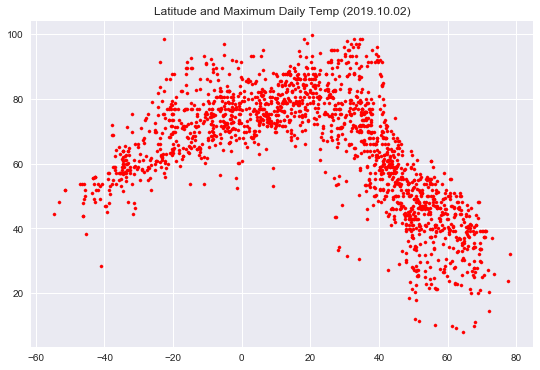

In [159]:
# MAKE THE PLOTS 
plt.figure(figsize=(9,6))
plt.title("Latitude and Maximum Daily Temp (2019.10.02)")
plt.scatter(city_weather_df.Lat, city_weather_df.MaxTemp, color= 'red', marker='o', s=10)
plt.savefig('Lat_X_Temp.png')

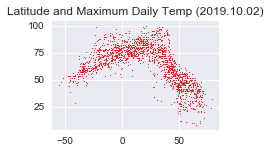

In [160]:
# MAKE THE PLOTS 
plt.figure(figsize=(3,2))
plt.title("Latitude and Maximum Daily Temp (2019.10.02)")
plt.scatter(city_weather_df.Lat, city_weather_df.MaxTemp, color= 'red', marker='o', s=0.5)
plt.savefig('sm_Lat_X_Temp.png')

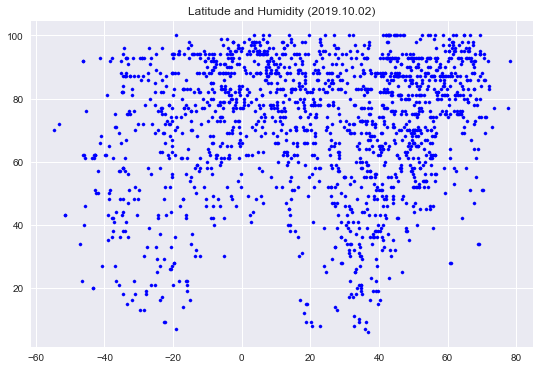

In [161]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.Lat, city_weather_df.Humidity, color= 'blue', marker='o', s=10)
plt.title("Latitude and Humidity (2019.10.02)")
plt.savefig('Lat_X_Humidity.png')

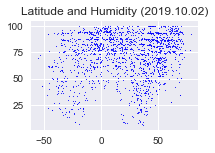

In [162]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.Lat, city_weather_df.Humidity, color= 'blue', s=0.5)
plt.title("Latitude and Humidity (2019.10.02)")
plt.savefig('sm_Lat_X_Humidity.png')

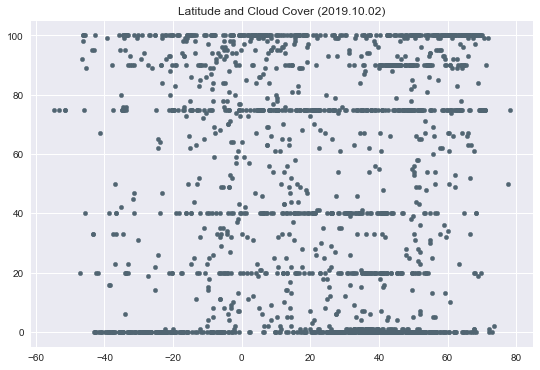

In [163]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.Lat, city_weather_df.Cloudiness, color = 'xkcd:slate', marker='o', s=20) 
plt.title("Latitude and Cloud Cover (2019.10.02)")
plt.savefig('Lat_X_Clouds.png')

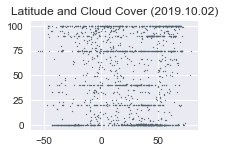

In [164]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.Lat, city_weather_df.Cloudiness, color = 'xkcd:slate', s=1) 
plt.title("Latitude and Cloud Cover (2019.10.02)")
plt.savefig('sm_Lat_X_Clouds.png')

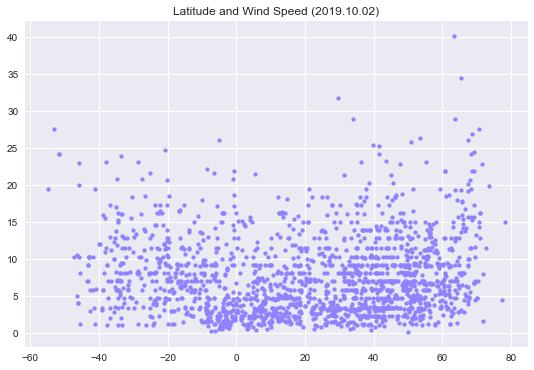

In [165]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.Lat, city_weather_df.WindSpeed, color= 'xkcd:periwinkle', marker='o', s=15)
plt.title("Latitude and Wind Speed (2019.10.02)")
plt.savefig('Lat_X_Wind.png')

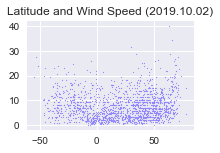

In [166]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.Lat, city_weather_df.WindSpeed, color= 'xkcd:periwinkle', s=0.75)
plt.title("Latitude and Wind Speed (2019.10.02)")
plt.savefig('sm_Lat_X_Wind.png')

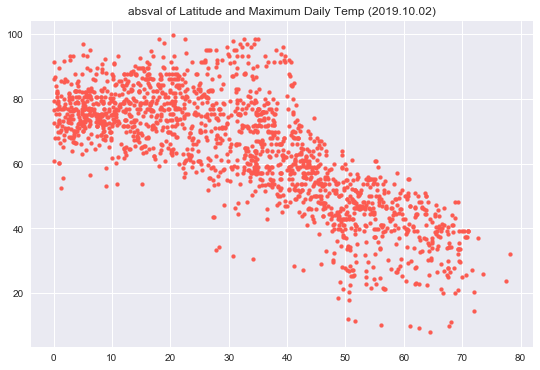

In [167]:
# MAKE THE SAME PLOTS USING ABSOLUTE LATITUDE
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.absLat, city_weather_df.MaxTemp, color= 'xkcd:coral', marker='o', s=15)
plt.title("absval of Latitude and Maximum Daily Temp (2019.10.02)")
plt.savefig('absLat_X_Temp.png')

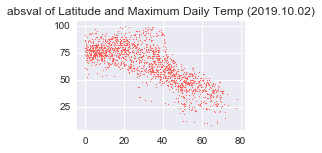

In [168]:
# MAKE THE SAME PLOTS USING ABSOLUTE LATITUDE
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.absLat, city_weather_df.MaxTemp, color= 'xkcd:coral', s=0.75)
plt.title("absval of Latitude and Maximum Daily Temp (2019.10.02)")
plt.savefig('sm_absLat_X_Temp.png')

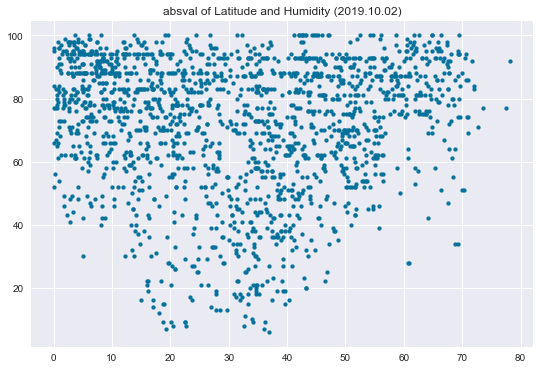

In [169]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.absLat, city_weather_df.Humidity, color= 'xkcd:ocean blue', marker='o', s=15)
plt.title("absval of Latitude and Humidity (2019.10.02)")
plt.savefig('absLat_X_Humidity.png')

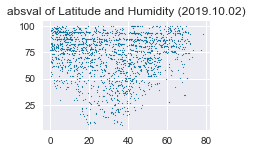

In [170]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.absLat, city_weather_df.Humidity, color= 'xkcd:ocean blue', s=0.75)
plt.title("absval of Latitude and Humidity (2019.10.02)")
plt.savefig('sm_absLat_X_Humidity.png')

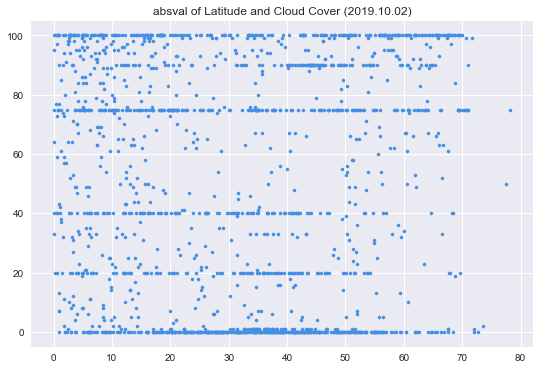

In [171]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.absLat, city_weather_df.Cloudiness, color = 'xkcd:dark sky blue', marker='o', s=10) 
plt.title("absval of Latitude and Cloud Cover (2019.10.02)")
plt.savefig('absLat_X_Clouds.png')

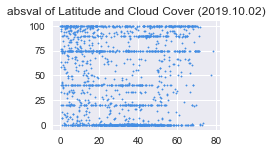

In [172]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.absLat, city_weather_df.Cloudiness, color = 'xkcd:dark sky blue', s=2) 
plt.title("absval of Latitude and Cloud Cover (2019.10.02)")
plt.savefig('sm_absLat_X_Clouds.png')

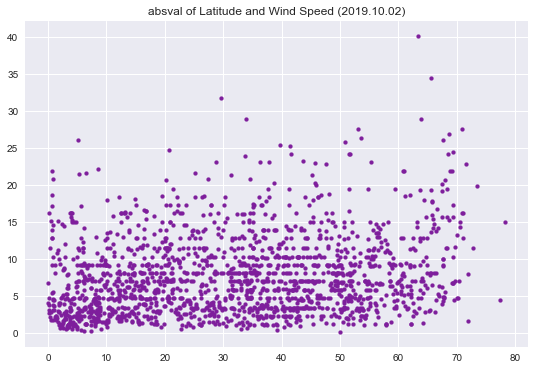

In [173]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.absLat, city_weather_df.WindSpeed, color= 'xkcd:purple', marker='o', s=15)
plt.title("absval of Latitude and Wind Speed (2019.10.02)")
plt.savefig('absLat_X_Wind.png')

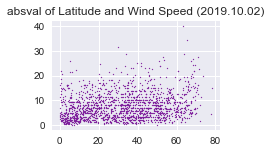

In [174]:
plt.figure(figsize=(3,2))
plt.scatter(city_weather_df.absLat, city_weather_df.WindSpeed, color= 'xkcd:purple', s=1)
plt.title("absval of Latitude and Wind Speed (2019.10.02)")
plt.savefig('sm_absLat_X_Wind.png')

In [176]:
city_weather_df.to_html('../resources/CityData.html')